# Task 1: Prediction Using Supervised ML
Predicting the percentage of a student based on the number of study hours. This is a simple linear regression task as it involves just two variables. Also we need to predict the score if a student studies for 9.25 hours/day.

Dataset used: http://bit.ly/w-data

Done by: Baibhav Saikia

### Importing the Data and Necessary Libraries

In [5]:
import pandas as pd                        #importing pandas for reading data
import numpy as np                         #importing numpy for numerical calculations
import matplotlib.pyplot as plt            #importing for plotting graphs
%matplotlib inline

In [6]:
url = "http://bit.ly/w-data"               #the url containing data
df = pd.read_csv(url)                      #reading the data as csv file using pandas

### Exploring the Data

In [7]:
df.describe()                              #prints the descriptive statistics of data

,Hours,Scores
count,25.000000,25.000000
mean,5.012000,51.480000
std,2.525094,25.286887
min,1.100000,17.000000
25%,2.700000,30.000000
50%,4.800000,47.000000
75%,7.400000,75.000000
max,9.200000,95.000000


In [8]:
df.head()                                  #prints the first 5 rows

,Hours,Scores
0,2.5,21
1,5.1,47
2,3.2,27
3,8.5,75
4,3.5,30


In [9]:
df.tail()                                  #prints the last 5 rows

,Hours,Scores
20,2.7,30
21,4.8,54
22,3.8,35
23,6.9,76
24,7.8,86


In [10]:
df.shape                                  #prints the dimensions(no.of rows, no.of columns)

(25, 2)

In [11]:
df.isnull().sum()                         #checking for null values

Hours     0
Scores    0
dtype: int64

### Data Visualization

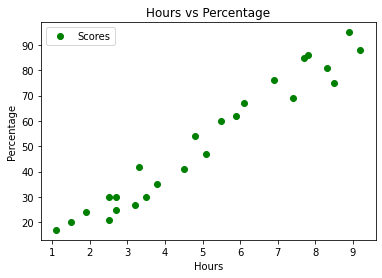

In [12]:
df.plot (x = 'Hours', y ='Scores', style ='go')
plt.title('Hours vs Percentage')
plt.xlabel('Hours')
plt.ylabel('Percentage')
plt.show()

We can infer a linear relationship between the number of hours a student studies and the percentage of marks obtained.

### Implementing Linear Regression

In [13]:
x = df.iloc[ : , :-1]                       #dividing the independent and dependent variables in the data
y = df.iloc[ : , 1]

In [14]:
x.head(),y.head()                           #checking the divided data sets

(   Hours
 0    2.5
 1    5.1
 2    3.2
 3    8.5
 4    3.5,
 0    21
 1    47
 2    27
 3    75
 4    30
 Name: Scores, dtype: int64)

In [15]:
from sklearn.model_selection import train_test_split  
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=0)

In [16]:
from sklearn.linear_model import LinearRegression  
LR = LinearRegression()  
LR.fit(x_train, y_train)

LinearRegression()

We have successfully trained the data with the linear regression model.

Slope of the regression line is : [9.91065648]
Intercept of the regression line is : 2.0181600414346974


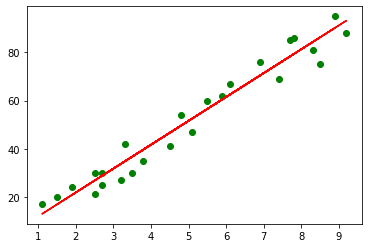

In [20]:
lrline = LR.coef_*x+LR.intercept_          #obtaining the values of parameters (intercept and slope) and plotting them

print("Slope of the regression line is :" , LR.coef_)
print("Intercept of the regression line is :", LR.intercept_)

plt.scatter(x, y, color='green')                             
plt.plot(x, lrline, color='red');
plt.show()

### Making Predictions

In [21]:
print(x_test)
y_pred = LR.predict(x_test)                                    #predicting the test values

    Hours
5     1.5
2     3.2
19    7.4
16    2.5
11    5.9


In [22]:
dfr = pd.DataFrame({'Original': y_test, 'Predicted': y_pred})    #making a data set with actual and predicted values
dfr

,Original,Predicted
5,20,16.884145
2,27,33.732261
19,69,75.357018
16,30,26.794801
11,62,60.491033


#### Predicting the percentage of the student if he/she studies for 9.25 hours/day

In [23]:
result=LR.coef_*9.25+LR.intercept_
result

array([93.69173249])

The student will score 93.69173249 if he/she studies for 9.25 hours/day.

### Testing accuracy of model

In [24]:
from sklearn.metrics import mean_absolute_error 
print('Mean Absolute Error:', mean_absolute_error(y_test, y_pred))

Mean Absolute Error: 4.183859899002975


In [25]:
from sklearn.metrics import mean_squared_error  
print('Mean Square Error:', mean_squared_error (y_test, y_pred))

Mean Square Error: 21.598769307217406


In [26]:
from sklearn.metrics import mean_squared_error    
print('Root Mean Square Error:', mean_squared_error (y_test, y_pred)**0.5)

Root Mean Square Error: 4.647447612100367


# Thank You